In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

import torch
import torchvision

# Original

In [2]:
image_path_oi = 'RGB1162X.jpg'

image = cv2.imread(image_path_oi)

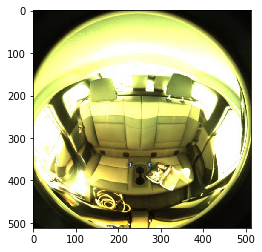

In [3]:
plt.imshow(image)

# Empty

In [6]:
left = image[:,:np.shape(image)[1]//2]
right = image[:,:np.shape(image)[1]//2][:,::-1]

image_new = np.hstack((left,right))

assert np.shape(image) == np.shape(image_new), 'np.shape(image) != np.shape(image_new)'

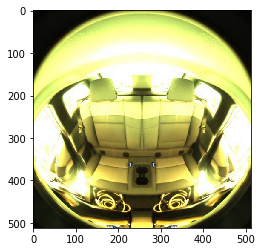

In [7]:
plt.imshow(image_new)

In [8]:
cv2.imwrite('empty_cars/orig/0000.jpg',image_new)

True

# Transforms

In [14]:
N = 10

In [15]:
transforms = torchvision.transforms.Compose([
    #torchvision.transforms.ColorJitter(hue=.5),
    #torchvision.transforms.ColorJitter(saturation=.5),
    
    torchvision.transforms.ColorJitter(contrast=.3),
    torchvision.transforms.ColorJitter(brightness=.4),
])

In [16]:
dataset = torchvision.datasets.ImageFolder('empty_cars/', transform=transforms)

In [17]:
dataset.imgs

[('empty_cars/orig/0000.jpg', 1),
 ('empty_cars/orig/.ipynb_checkpoints/0000-checkpoint.jpg', 1)]

In [18]:
def show_dataset(dataset, n=6):
    img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis('off')

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


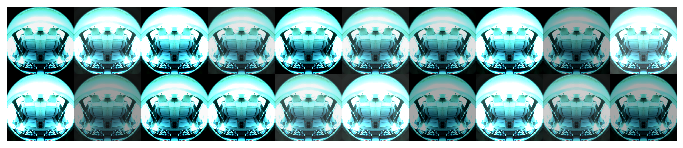

In [19]:
show_dataset(dataset,n=N)

In [20]:
def save_augmented_images(dataset,n=5,path='empty_cars/'):
    
    images = [np.array(dataset[i][0]) for _ in range(n) for i in range(len(dataset))]
    
    for i,image in enumerate(images):
        cv2.imwrite(path + 'RGB' + str(i).zfill(4) + 'F.jpg', image)

In [21]:
save_augmented_images(dataset,n=N,path='empty_cars/')

In [2]:
images_oi = [a for a in os.listdir('.') if 'RGB' in a]
print(images_oi)

['RGB0299X.jpg', 'RGB0298X.jpg', 'RGB1162X.jpg']


In [16]:
predictions = pd.read_csv('predictions_baseline.csv',header=None)

predictions.T

,0,1,2,3,4,5,6,7,8,9,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761
0,RGB0508X.jpg,RGB0508X.jpg,RGB0508X.jpg,RGB0329X.jpg,RGB0329X.jpg,RGB0329X.jpg,RGB0207X.jpg,RGB0207X.jpg,RGB0207X.jpg,RGB0457X.jpg,...,RGB0810X.jpg,RGB0168X.jpg,RGB0168X.jpg,RGB0168X.jpg,RGB0883X.jpg,RGB0521X.jpg,RGB0521X.jpg,RGB0276X.jpg,RGB0276X.jpg,RGB0276X.jpg
1,281.516,242.463,301.596,303.39,135.789,234.14,240.055,300.105,175.926,162.012,...,242.624,208.541,294.64,238.964,282.533,211.481,270.424,283.152,242.788,148.748
2,325.56,321.763,322.438,331.339,328.951,337.903,337.74,334.464,335.149,356.153,...,339.076,342.408,337.491,334.947,341.192,391.164,336.253,407.688,363.881,335.673
3,290.226,259.553,311.103,335.445,167.567,257.065,265.645,318.982,207.124,184.569,...,266.249,221.004,318.661,268.524,310.603,278.419,318.45,319.475,261.225,159.453
4,352.558,352.362,351.227,364.901,363.3,351.997,365.149,360.007,348.115,372.944,...,355.054,378.359,377.96,374.687,368.817,445.17,370.119,425.897,387.613,361.699
5,5,-1,-1,2,2,2,4,4,4,4,...,9,1,1,1,7,6,6,4,4,4
6,0.856429,0.495574,0.394638,0.99715,0.985512,0.946936,0.986079,0.980115,0.97795,0.985718,...,0.993534,0.997429,0.99509,0.972709,0.998075,0.999722,0.997675,0.971919,0.971004,0.961122


In [37]:
#paths,bboxs,classes = get_stuff_from_dataframe(annotations)
paths,bboxs,classes = get_stuff_from_dataframe(predictions)

In [43]:
#image_path = np.random.choice(images_oi)
#image_path = 'RGB1162X.jpg'
image
image_path

'RGB1162X.jpg'

In [44]:
bboxs_oi = bboxs[paths == image_path]
bboxs_oi

array([], shape=(0, 4), dtype=float64)

In [45]:
classes_oi = classes[paths == image_path]
classes_oi

array([], dtype=int64)

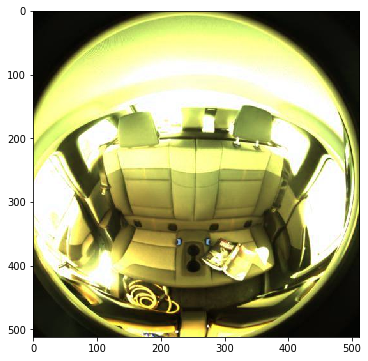

In [41]:
image = cv2.imread(image_path)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(image)

for class_oi,bbox_oi in zip(classes_oi,bboxs_oi):
    x_min,x_max,y_min,y_max = bbox_oi
    h,w = y_max-y_min,x_max-x_min
    bbox = patches.Rectangle((x_min,y_min),h,w,facecolor='none',linewidth=2,edgecolor='b',alpha=0.7)
    ax.add_patch(bbox)
    
    ax.text(x_min,x_max,str(class_oi),horizontalalignment='center',verticalalignment='center')
    
plt.show()